# Прогнозирование удовлетворенности работой и увольнения сотрудников для компании «Работа с заботой»

Этот проект создан в помощь HR-аналитикам компании «Работа с заботой», которые помогают бизнесу оптимизировать управление персоналом.

Будет разработано 2 модели для предсказания:
1. уровня удовлетворённости сотрудника на основе данных заказчика,
2. вероятности увольнения сотрудника.

Эти данные позволят бизнесу предотвратить отток сотрудников и избежать рисков, с ним связанных.

**План работы**

Проект будет разделен на 2 части в соответствии с работой над 2-мя моделями: 1) для предсказания удовлетворенности; 2) для предсказания увольнения.

Каждая из частей будет содержать:
- исследовательский анализ данных,
- подготовку данных к моделированию,
- обучение модели,
- анализ лучшей модели и наиболее важных для ее обучения признаков.

**Описание данных**

Часть 1
- train_job_satisfaction_rate.csv - тренировочная выборка,
- test_features.csv - входные признаки тестовой выборки,
- test_target_job_satisfaction_rate.csv - целевой признак тестовой выборки.

Входные признаки:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;

Целевой признак:
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании


Часть 2
- train_quit.csv - тренировочная выборка,
- test_features.csv - входные признаки тестовой выборки,
- test_target_quit.csv - целевой признак тестовой выборки.

Входные признаки:

- те же, что и в первой части.

Целевой признак:
- quit — увольнение сотрудника из компании

## Часть 1. Удовлетворенность сотрудника работой

### Знакомство с данными

In [ ]:
!pip install phik -q

In [ ]:
!pip install scikit-learn==1.1.3 -q

In [ ]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import phik

from matplotlib import pyplot as plt

from scipy import stats as st

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler,
    PolynomialFeatures
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    roc_auc_score,
    make_scorer
)

from sklearn.cluster import KMeans

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

# задаем константу
RANDOM_STATE = 42

In [ ]:
try:
    train_df_satisfaction = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    print("Данные успешно загружены")
    display(train_df_satisfaction.head())
    train_df_satisfaction.info()
    
except:
    print("Ошибка загрузки данных")

Данные успешно загружены


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [ ]:
try:
    test_df_features = pd.read_csv('/datasets/test_features.csv')
    print("Данные успешно загружены")
    test_df_features = test_df_features
    display(test_df_features.head())
    test_df_features.info()
    
except:
    print("Ошибка загрузки данных")

Данные успешно загружены


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [ ]:
try:
    test_df_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
    print("Данные успешно загружены")
    display(test_df_target.head())
    test_df_target.info()
    
except:
    print("Ошибка загрузки данных")

Данные успешно загружены


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Что можно сказать о данных:
- есть пропуски,
- формат данных соответствует содержанию столбцов, 
- названия столбцов унифицированы и не отличаются от файла к файлу.

### Предобработка данных

#### Пропуски

In [ ]:
# выведем строки, где есть пропуски
display(train_df_satisfaction[train_df_satisfaction.isna().any(axis=1)])
display(test_df_features[test_df_features.isna().any(axis=1)])

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


Видим, что отдел пропущен у джунов, а уровень квалификации - у продаж. 

In [ ]:
# проверим, какие самые частые значения в столбцах с пропусками по сегметам
most_common_depts = train_df_satisfaction.groupby('level')['dept'].apply(lambda x: x.mode()[0])
most_common_level = train_df_satisfaction.groupby('dept')['level'].apply(lambda x: x.mode()[0])

print('Самые частые значения отделов у сотрудников разного уровня', most_common_depts)
print('Самые частые значения уровней у сотрудников из разных отделов', most_common_level)

Самые частые значения отделов у сотрудников разного уровня level
junior    sales
middle    sales
sinior    sales
Name: dept, dtype: object
Самые частые значения уровней у сотрудников из разных отделов dept
hr            junior
marketing     junior
purchasing    junior
sales         junior
technology    junior
Name: level, dtype: object


In [ ]:
# проверим, какие самые частые значения в целом у этих столбцов
print('Мода для столбца level:', train_df_satisfaction['level'].mode()[0])
print('Мода для столбца dept:', train_df_satisfaction['dept'].mode()[0])

Мода для столбца level: junior
Мода для столбца dept: sales


Видим, что у во всех сегментах одинаковые значения моды, поэтому заполним пропуски общей модой по столбцу с помощью SimpleImputer в пайплайне, когда будем предобрабатывать данные для обучения модели. Пропусков не так много, поэтому их наличие не повлияет на результат исследовательского анализа.

#### Дубликаты

**Явные дубликаты**

In [ ]:
display('Дубликатов в train_df_satisfaction', train_df_satisfaction.duplicated().sum())
display('Дубликатов в test_df_features', test_df_features.duplicated().sum())

'Дубликатов в train_df_satisfaction'

0

'Дубликатов в test_df_features'

0

Явных дубликатов нет.

**Неявные дубликаты**

Вывелем названия переменных в столбцах с категориальными данными, чтобы удостовериться, что все переменные написаны одинаково, нет опечаток.

In [ ]:
cat_columns = [
    'level', 
    'dept',
    'workload', 
    'last_year_promo', 
    'last_year_violations'
]

for column in cat_columns:
    print(column)
    print(train_df_satisfaction[column].value_counts())
    print("-" * 30)

level
junior    1894
middle    1744
sinior     358
Name: level, dtype: int64
------------------------------
dept
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64
------------------------------
workload
medium    2066
low       1200
high       734
Name: workload, dtype: int64
------------------------------
last_year_promo
no     3880
yes     120
Name: last_year_promo, dtype: int64
------------------------------
last_year_violations
no     3441
yes     559
Name: last_year_violations, dtype: int64
------------------------------


In [ ]:
cat_columns = [
    'level', 
    'dept',
    'workload', 
    'last_year_promo', 
    'last_year_violations'
]

for column in cat_columns:
    print(column)
    print(test_df_features[column].value_counts())
    print("-" * 30)

level
junior    974
middle    854
sinior    171
Name: level, dtype: int64
------------------------------
dept
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64
------------------------------
workload
medium    1043
low        593
high       363
             1
Name: workload, dtype: int64
------------------------------
last_year_promo
no     1937
yes      63
Name: last_year_promo, dtype: int64
------------------------------
last_year_violations
no     1738
yes     262
Name: last_year_violations, dtype: int64
------------------------------


В датафреймах train_df_satisfaction и test_df_features неявных дубликатов нет. Зато мы видим, что в тестовой выборке в столбцах  dept и workload есть значения, состоящие из одного пробела. Они будут обработаны в пайплайне при подготоаке данных.

### Исследовательский анализ данных

#### Количественные признаки train_df_satisfaction

In [ ]:
train_df_satisfaction.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


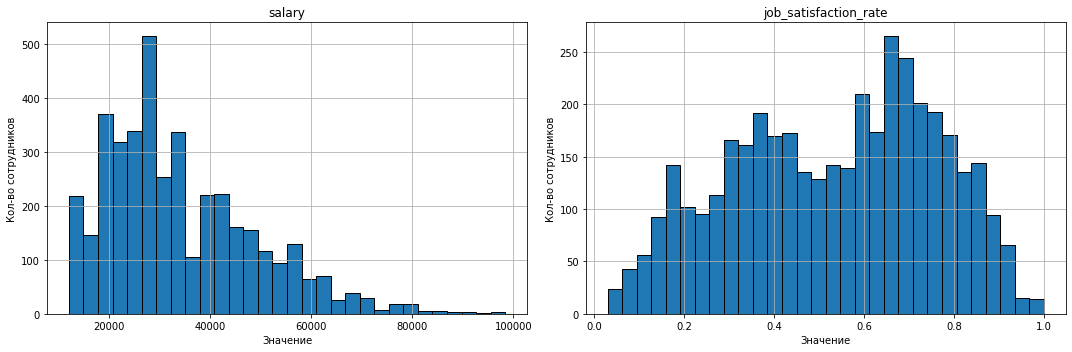

In [ ]:
# построим гистограмму для анализа количественных признаков
cont_columns = [
    'salary',
    'job_satisfaction_rate'
]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes = axes.flatten()

for i, column in enumerate(cont_columns):
    ax = axes[i]
    ax.hist(train_df_satisfaction[column], bins=30, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Кол-во сотрудников')
    ax.grid()
        
plt.tight_layout()
plt.show()

1. Зарплата.

Распределение похоже на логнормальное и смещено вправо (среднее 33927 > медианы 30000). Пик находится в районе 27000. График отражает типичную иерархию в компании: есть большая масса рядовых специалистов с зарплатами в районе моды, а длинный правый "хвост" — это небольшое количество руководителей, топ-менеджеров или уникальных высокооплачиваемых специалистов.

2. Уровень удовлетворённости работой в компании (целевой признак).

Видим многомодальное распределение с 3 явными пиками. Самый большой - в районе 0.65, второй - 0.38, третий - 0.19. Это похоже на 3 распределения внутри одного. Основываясь на этом предположении можно выделить 3 категории сотрудников: 1) довольные (только пришли в кампанию или недавно получили повышение), 2) нейтрально настроенные (ясно видят и плюсы, и минусы компании) и 3) выгоревшие (немотивированные сотрудники, которые, возможно, уже ищут новую работу).

#### Категориальные признаки train_df_satisfaction

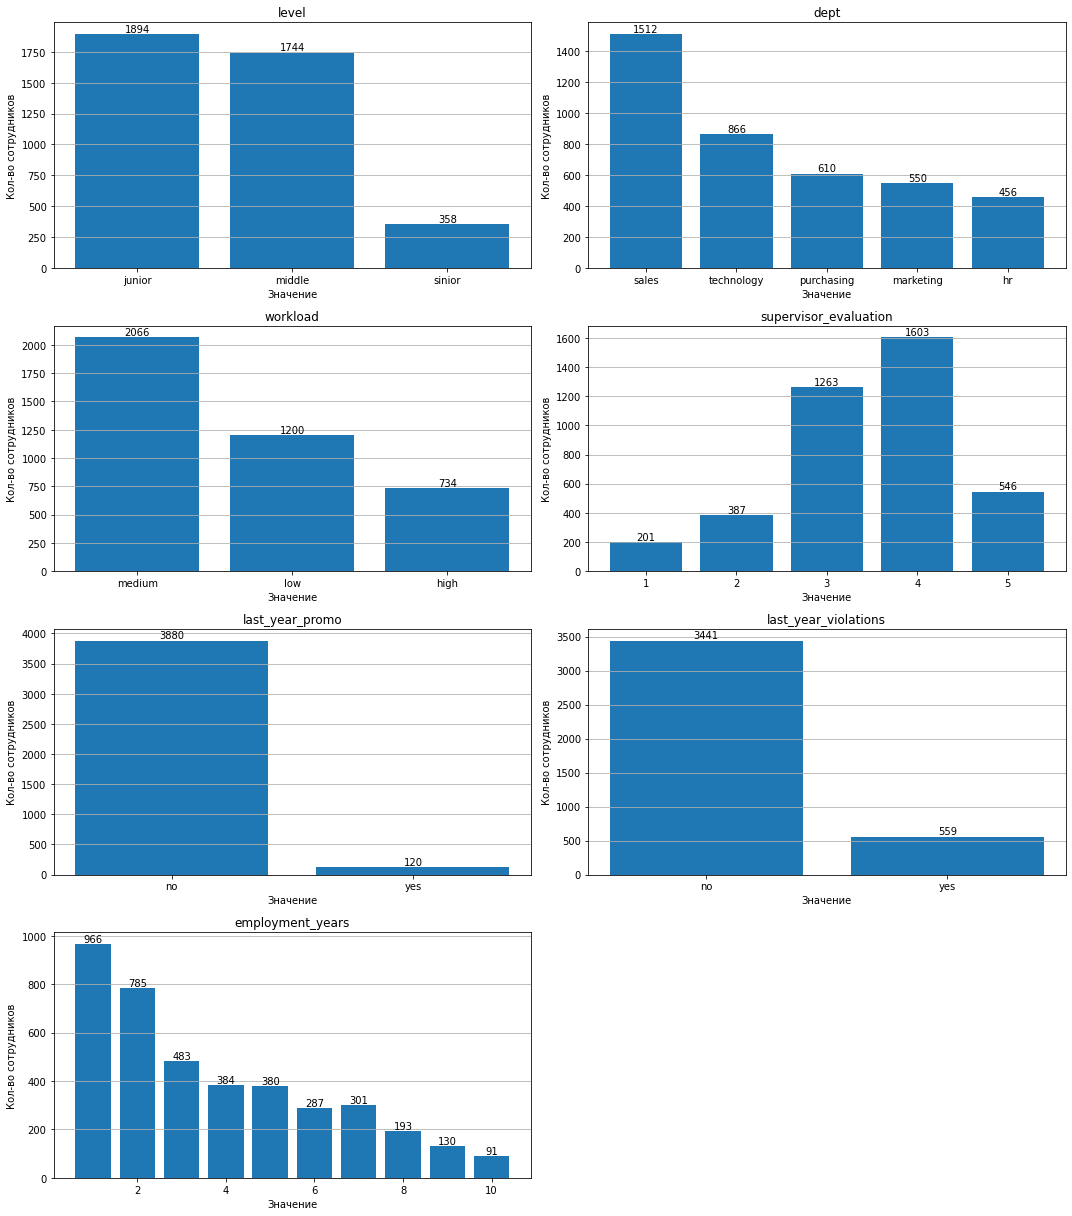

In [ ]:
# построим столбчатую диаграмму для анализа количественных признаков
discr_columns = [
    'level', 
    'dept',
    'workload', 
    'supervisor_evaluation',
    'last_year_promo', 
    'last_year_violations',
    'employment_years'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 17))

axes = axes.flatten()

for i, column in enumerate(discr_columns):
    ax = axes[i]
    bar_data = train_df_satisfaction[column].value_counts()
    ax.bar(bar_data.index, bar_data.values)
    for index, value in zip(bar_data.index, bar_data.values):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
    ax.set_title(column)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Кол-во сотрудников')
    ax.tick_params(axis='x')
    ax.grid(axis='y')
    if len(discr_columns) < len(axes):
        axes[-1].set_visible(False)
        
plt.tight_layout()
plt.show()

1. Уровень должности.

Старшие специалисты занимают всего 9% от всего числа сотрудников - их 358. Начинающих специалистов больше всего (1894) - это 47%. Немногим меньше специалистов среднего уровня (1744). Такая сильная диспропорция (начинающих очень много, старших очень мало) может приводить тому, что старшие специалисты будут сильно перегружены задачами: на них ложится и ответственность за свои задачи, и обучение большого количества джунов. Плюс такое низкое число позиций сеньоров может объяснить высокий уровень текучки в первые 3 года работы: специалисты не видят, куда расти после мидла (мало вакантных мест сеньоров).

2. Отделы.

Самый крупный отдел - это "продажи" (1512 сотрудников), следом  идет отдел технологий (866) - он почти в 2 раза меньше, чем "продажи". Самый маленький отдел - это HR (456 сотрудника). Огромный отдел продаж по сравнению с остальными говорит о том, что компания, скорее всего, делает ставку на активные продажи и привлечение клиентов, а не, например, на технологическое развитие продукта.

3. Загруженность сотрудников.

У большей части сотрудников (52%) загруженность средня. Высокая загруженность наблюдается у 18% сотрудников, а низкая - у 30%. Это говорит о неэффективной стратегии распределения задач: почти треть сотрудников работает вполсилы, в то время как 20% перерабатывает. Можно предположить, что среди сотрудников с низкой загруженностью самый низкий уровень удовлетворенности: выгоревшие сотрудники не берут на себя инициативу и много задач - это похоже на тихий протест.

4. Оценка качества работы сотрудника от руководителя.

Распределение дискретное, смещенное влево. Оценки распределены от 1 до 5. В 40% случаев руководители оценивают работу сотрудников как хорошую (4) - это мода. Следующая по популярности оценка (32%) - удовлетворительно (3). Оценку 5 сотрудники получают всего в 14% случаев. Реже всего сотрудники получают оценку 1 - 5%. Сотрудники с оценкой 5, кто в последний год не получил повышение, - это группа риска. Они либо скоро уволятся, либо станут хуже работать и перейдут в категорию "протестантов".

5. Получили повышение за последний год.

Всего 3% сотрудников получили повышение за последний год. Это очень низкий показатели, и он может говорить о крайней необходимость наладить в компании систему мотивации карьерного роста для сотрудников. Такой низкий показатель повышений также объясняет 1) высокую текучку кадров, 2) низкую удовлетворенность работой (категория выгоревших), 3) нарушение трудового договора (сотрудники сабботируют нормы трудовых отношений в качестве протеста).

6. Нарушение трудового договора.

За последний год 14% сотрудников нарушили трудовой договор (вероятно, в эту категорию входят прогулы, опоздания и тд). Скорее всего, сотрудники, неудовлетворенные работой, совершают нарушения чаще.

7. Длительность работы в компании.

Распределение дискретное, похоже на экспоненциальное. Больше всего сотрудников работает в компании 1 год (мода), меньше всего - 10. От года до 10 лет количество сотрудников уменьшается с каждым годом. Самое резкое уменьшение в числе сотрудников происходят в первые 3 года. Судя по медиане (3), половина всех сотрудников работает в кампании 1-3 года. Ситуацию, представленную на графике, можно охарактеризовать как "текучка кадров".

#### Проверка гипотез

In [ ]:
# проверим гипотезу про перегруженность сеньоров
df_result = train_df_satisfaction.groupby(['level', 'workload']).size().to_frame('count')
total_per_level = df_result.groupby('level')['count'].transform('sum')
df_result['percentage'] = (df_result['count'] / total_per_level * 100).round(2)

display(df_result)

count  percentage
level  workload                   
junior high        184        9.71
       low         615       32.47
       medium     1095       57.81
middle high        436       25.00
       low         516       29.59
       medium      792       45.41
sinior high        114       31.84
       low          68       18.99
       medium      176       49.16

Так и есть. Процент высокой загруженности среди сеньоров самый высокий из всех - 31.8% (против 25% у мидлов и 9.7% у джунов).

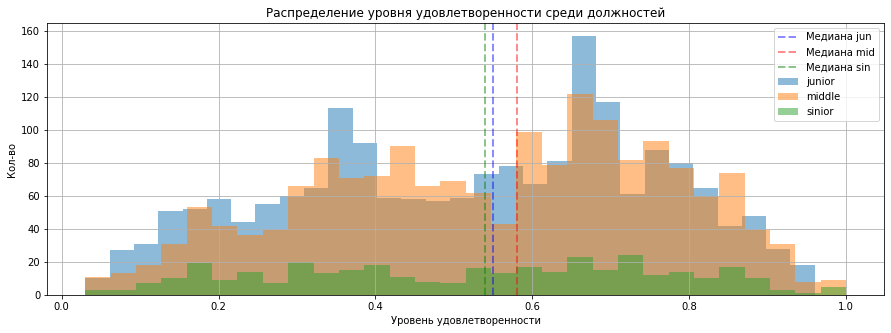

Медиана удовлетворенности джунов 0.55
Медиана удовлетворенности мидлов 0.58
Медиана удовлетворенности сеньоров 0.54


In [ ]:
# проверим уровень удовлетворенности среди разных должностей
jun_df = train_df_satisfaction[train_df_satisfaction['level'] == 'junior']
mid_df = train_df_satisfaction[train_df_satisfaction['level'] == 'middle']
sin_df = train_df_satisfaction[train_df_satisfaction['level'] == 'sinior']

plt.figure(figsize=(15, 5))
plt.hist(jun_df['job_satisfaction_rate'], bins=30, alpha=0.5, label='junior')
plt.hist(mid_df['job_satisfaction_rate'], bins=30, alpha=0.5, label='middle')
plt.hist(sin_df['job_satisfaction_rate'], bins=30, alpha=0.5, label='sinior')

plt.axvline(jun_df['job_satisfaction_rate'].median(), 
         color='blue', 
         alpha=0.45, 
         linestyle='--', 
         linewidth=2, 
         label=f'Медиана jun')
plt.axvline(mid_df['job_satisfaction_rate'].median(), 
         color='red', 
         alpha=0.45, 
         linestyle='--', 
         linewidth=2, 
         label=f'Медиана mid')
plt.axvline(sin_df['job_satisfaction_rate'].median(), 
         color='green', 
         alpha=0.45, 
         linestyle='--', 
         linewidth=2, 
         label=f'Медиана sin')

plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Кол-во')
plt.title('Распределение уровня удовлетворенности среди должностей')
plt.grid()
plt.legend()
plt.show()

print('Медиана удовлетворенности джунов', jun_df['job_satisfaction_rate'].median())
print('Медиана удовлетворенности мидлов', mid_df['job_satisfaction_rate'].median())
print('Медиана удовлетворенности сеньоров', sin_df['job_satisfaction_rate'].median())

Самый низкий уровень удовлетворенности у сеньоров (медиана 0.54). На него, скорее всего, влияют высокая нагрузка и отсутствие карьерных перспектив: если нет ясных карьерных треков, непонятно, куда расти сеньору после того, как он стал сеньором. У этой категории, по сравнению с другими, достаточно "ровное" распределение. У них нет одного "главного" пика. Это говорит о том, что группа сильно поляризована: есть и вполне довольные сеньоры (в правой части графика), но есть и значительная доля очень недовольных (в левой).

Следом с разницей в 0.01 идут джуны. Кажется, что среди этой категории сотрудников, новых и полных энтузиазма, удовлетворенность работой должна быть выше, но, судя по графику, они составляют примерно половину от "выгоревших" сотрудников. На их низкий уровень удовлетворенности может влиять недостаточное внимание наставников (перегруженные сеньоры) или полное отсутствие выстроенной системы наставничества, неясные карьерные перспективы и, вероятно, низкая зарплата (а повышения, как мы помним, происходят в кампании очень редко).

Самая "довольная" категория - это мидлы.Они уже прошли "период разочарования" джунов, обладают достаточной компетенцией, чтобы чувствовать себя уверенно и еще не уперлись в потолок карьерного роста, как сеньоры.

Многомодальность распределения прослеживается во всех 3-ех группах.

Таким образом, мы нашли **2 проблемные точки** в кампании: 1) адаптация, обучение, карьерный рост новичков и 2) карьерное развитие экспертов.

In [ ]:
# проверим гипотезу о том, что "неудовлетворенные" сотрудники чаще нарушают трудовой договор
violations_satisfaction = train_df_satisfaction.groupby('last_year_violations')['job_satisfaction_rate'].median()

display(violations_satisfaction)

last_year_violations
no     0.6
yes    0.3
Name: job_satisfaction_rate, dtype: float64

Средний уровень удовлетворения сотрудников, нарушающих договор, в 2 раза ниже, чем у не нарушающих (медиана 3 VS 6).

#### Корреляционный анализ

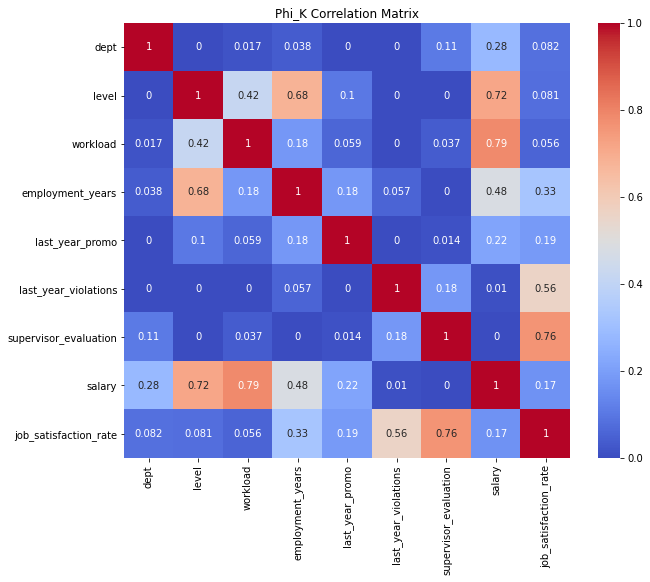

In [ ]:
# построим мартицу корреляций с помощью phik
phik_df = train_df_satisfaction.drop('id', axis=1)
corr_matrix = phik_df.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

С целевым признаком (удовлетворенность работой) сильнее всего коррелирует оценка руководителя (коэффициент 0.76 - сильная прямая зависимость) и факт нарушений за последний год (0.56 - средняя зависимость). Слабая связь у удовлетворенности работой есть и с ее длительностью (0.33)

Сильная связь входных признаков:
- зарплата и нагрузка (0.79),
- зарплата и уровень должности (0.72),
- уровень должности и длительность работы (0.68),

Средняя связь входных признаков:
- зарплата и длительность работы (0.48),
- уровень должности и нагрузка (0.42).

Связь между признаками не такая сильная, чтобы могла возникнуть мультиколлинеарность.

#### Вывод: как подготовить данные

**Кодирование и масштабирование**

1. Количественные данные.

Для корректного обучения модели все числовые переменные нужно масштабировать, чтобы модель не придавала большее значение переменной "зарплата" только потому, что она в разы больше всех остальных. Для этого мы будем использовать 
- **MinMaxScaler**, потому что: 1) подходит для переменных, не имеющих нормального распределения, 2) в наших данных нет проблемы с выбросами.

Но в качестве эксперимента сравним его и с другими скейлерами:
- StandardScaler,
- RobustScaler.

Столбцы для масштабирования: salary, employment_years, supervisor_evaluation.

2. Категориальные данные.

Чтобы текст в категориальных признаках перевести на понятный машине язык (числовой), их нужно кодировать. Для этого мы будем использовать 2 кодировщика:
- **OneHotEncoder**: подходит для данных, в которых нет ранжирования и все категории равнозначны.

Столбцы для кодирования: dept, last_year_promo, last_year_violations.

- **OrdinalEncoder**: кодирует признаки, в которых есть порядок / последовательность, например, junior-middle-sinior в level.

Столбцы для кодирования: level, workload.


**Создание новых признаков**

Для усиления наших данных добавим дополнительные признаки с помощью нескольких методов:
1. Полиномизация (возведение признака в степень) помогает линейным моделям лучше улавливать криволинейную зависимость

2. Признаки на основе бизнес-логики:
- is_undervalued (бинарный признак: 1 или 0) - это признак на основе предположения о недооцененных сотрудниках. Например, если у сотрудника supervisor_evaluation >= 4, а last_year_promo = 'no', то is_undervalued = 1. Мы явно указываем модели на группу, которую считаем проблемной.

### Подготовка данных

Добавим новые признаки в тренировочную и тестовую выборки.

In [ ]:
# добавляем новый признак в тренировочную выборку
train_df_stsf_new = train_df_satisfaction.copy()
train_df_stsf_new['is_undervalued'] = 'no'
train_df_stsf_new.loc[
    (train_df_stsf_new['supervisor_evaluation'] >= 4) & 
    (train_df_stsf_new['last_year_promo'] == 'no'), 'is_undervalued'] = 'yes'

display(train_df_stsf_new.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,is_undervalued
0,155278,sales,junior,medium,2,no,no,1,24000,0.58,no
1,653870,hr,junior,high,2,no,no,5,38400,0.76,yes
2,184592,sales,junior,low,1,no,no,2,12000,0.11,no
3,171431,technology,junior,low,4,no,no,2,18000,0.37,no
4,693419,hr,junior,medium,1,no,no,3,22800,0.20,no


In [ ]:
# добавляем новый признак в тестовую выборку
test_df_ftr_new = test_df_features.copy()
test_df_ftr_new['is_undervalued'] = 'no'
test_df_ftr_new.loc[
    (test_df_ftr_new['supervisor_evaluation'] >= 4) & 
    (test_df_ftr_new['last_year_promo'] == 'no'), 'is_undervalued'] = 'yes'

display(test_df_ftr_new.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,is_undervalued
0,485046,marketing,junior,medium,2,no,no,5,28800,yes
1,686555,hr,junior,medium,1,no,no,4,30000,yes
2,467458,sales,middle,low,5,no,no,4,19200,yes
3,418655,sales,middle,low,6,no,no,4,19200,yes
4,789145,hr,middle,medium,5,no,no,5,40800,yes


Создадим новые признаки с помощью полиномизации.

In [ ]:
num_columns = ['salary', 'employment_years']
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_X_train = poly.fit_transform(train_df_stsf_new[num_columns])
poly_X_test = poly.transform(test_df_ftr_new[num_columns])

# сохранение таблицы X_test с полиномиальными признаками до стандартизации
poly_X_train_df = pd.DataFrame(poly_X_train,columns = poly.get_feature_names_out())
poly_X_test_df = pd.DataFrame(poly_X_test,columns = poly.get_feature_names_out())

X_train_df = pd.concat([poly_X_train_df,train_df_stsf_new.drop(columns=num_columns)], axis=1)
X_test_df = pd.concat([poly_X_test_df, test_df_ftr_new.drop(columns=num_columns)], axis=1)

# проверим, все ли столбцы на месте
display(X_train_df.info())
display(X_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary                   4000 non-null   float64
 1   employment_years         4000 non-null   float64
 2   salary^2                 4000 non-null   float64
 3   salary employment_years  4000 non-null   float64
 4   employment_years^2       4000 non-null   float64
 5   id                       4000 non-null   int64  
 6   dept                     3994 non-null   object 
 7   level                    3996 non-null   object 
 8   workload                 4000 non-null   object 
 9   last_year_promo          4000 non-null   object 
 10  last_year_violations     4000 non-null   object 
 11  supervisor_evaluation    4000 non-null   int64  
 12  job_satisfaction_rate    4000 non-null   float64
 13  is_undervalued           4000 non-null   object 
dtypes: float64(6), int64(2),

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary                   2000 non-null   float64
 1   employment_years         2000 non-null   float64
 2   salary^2                 2000 non-null   float64
 3   salary employment_years  2000 non-null   float64
 4   employment_years^2       2000 non-null   float64
 5   id                       2000 non-null   int64  
 6   dept                     1998 non-null   object 
 7   level                    1999 non-null   object 
 8   workload                 2000 non-null   object 
 9   last_year_promo          2000 non-null   object 
 10  last_year_violations     2000 non-null   object 
 11  supervisor_evaluation    2000 non-null   int64  
 12  is_undervalued           2000 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 203.2+ KB


None

In [ ]:
# превратим id в индексы и отсортируем данные в тестовой части
X_test_df = X_test_df.set_index('id')
test_df_target = test_df_target.set_index('id')

X_test_df = X_test_df.sort_index()
test_df_target = test_df_target.sort_index()

display(X_test_df.head())
display(test_df_target.head())

,salary,employment_years,salary^2,salary employment_years,employment_years^2,dept,level,workload,last_year_promo,last_year_violations,supervisor_evaluation,is_undervalued
id,,,,,,,,,,,,
100298,19200.0,2.0,3.686400e+08,38400.0,4.0,hr,junior,low,no,no,4,yes
100480,16800.0,4.0,2.822400e+08,67200.0,16.0,marketing,junior,low,no,no,4,yes
100503,55200.0,5.0,3.047040e+09,276000.0,25.0,purchasing,middle,high,no,no,4,yes
100610,43200.0,5.0,1.866240e+09,216000.0,25.0,sales,middle,medium,no,no,4,yes
100692,48000.0,6.0,2.304000e+09,288000.0,36.0,sales,middle,high,no,no,4,yes


,job_satisfaction_rate
id,
100298,0.80
100480,0.84
100503,0.79
100610,0.75
100692,0.69


Создадим пайплайн для подготовки признаков к моделированию.

In [ ]:
# разбиваем данные
X_train  = X_train_df.drop(['id','job_satisfaction_rate'], axis=1)
y_train = X_train_df['job_satisfaction_rate']
X_test = X_test_df
y_test = test_df_target['job_satisfaction_rate']

# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations', 'is_undervalued']
ord_columns = ['level', 'workload']
num_columns = [
    'salary', 
    'employment_years',
    'salary^2', 
    'salary employment_years',
    'employment_years^2',
    'supervisor_evaluation'
]

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)


### Обучение модели

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models__max_depth': range(2, 11),
        'models__max_features': [0.5, 0.7, 0.9, 'sqrt', 'log2', None],
        'models__min_samples_leaf': range(2, 11),
        'models__min_samples_split': [2, 5, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели LinearRegression() 
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    }
]

# создаём функцию для оценки качества модели SMAPE
def smape(y_true, y_pred):
    # вычисляем smape
    step_1 = np.abs(y_pred - y_true)
    step_2 = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    # Считаем среднее по всем элементам и умножаем на 100
    return np.mean(step_1 / step_2) * 100

# создаём пользовательскую метрику
smape_scorer = make_scorer(smape, greater_is_better=False)


# Запускаем поиск только для дерева
rs = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=30
)
rs.fit(X_train, y_train)
print("Лучший результат модели:", rs.best_score_)

Лучший результат модели: -15.581905703784992


In [ ]:
# проверим визуально, все ли в порядке с данными после кодирования и масштабирования
X_train_processed = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)    

X_test_processed = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 
    
display(X_train_processed.head())
display(X_test_processed.head())

,ohe__dept_hr,ohe__dept_marketing,ohe__dept_purchasing,ohe__dept_sales,ohe__dept_technology,ohe__last_year_promo_no,ohe__last_year_promo_yes,ohe__last_year_violations_no,ohe__last_year_violations_yes,ohe__is_undervalued_no,ohe__is_undervalued_yes,ord__level,ord__workload,num__salary,num__employment_years,num__salary^2,num__salary employment_years,num__employment_years^2,num__supervisor_evaluation
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.666273,-0.675991,-0.636170,-0.683152,-0.666450,-2.455174
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.300245,-0.675991,0.081069,-0.477624,-0.666450,1.510381
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.471705,-1.069351,-0.980996,-0.940061,-0.789185,-1.463785
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.068989,0.110731,-0.837319,-0.511879,-0.175511,-1.463785
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.746816,-1.069351,-0.680997,-0.862988,-0.789185,-0.472397


,ohe__dept_hr,ohe__dept_marketing,ohe__dept_purchasing,ohe__dept_sales,ohe__dept_technology,ohe__last_year_promo_no,ohe__last_year_promo_yes,ohe__last_year_violations_no,ohe__last_year_violations_yes,ohe__is_undervalued_no,ohe__is_undervalued_yes,ord__level,ord__workload,num__salary,num__employment_years,num__salary^2,num__salary employment_years,num__employment_years^2,num__supervisor_evaluation
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.988446,-0.675991,-0.801687,-0.751661,-0.666450,0.518992
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.149532,0.110731,-0.870652,-0.546133,-0.175511,0.518992
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.427849,0.504092,1.336237,0.943940,0.192694,0.518992
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.622418,0.504092,0.393712,0.515758,0.192694,0.518992
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.944590,0.897453,0.743136,1.029577,0.642722,0.518992


In [ ]:
print('Лучшая модель и её параметры:\n\n', rs.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations',
                                                   'is_undervalued']),
                                                 ('ord',
                                                  Pipeline(st

In [ ]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred = rs.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {smape(y_test, y_test_pred)}')

Метрика SMAPE на тестовой выборке: 14.587745698828622


In [ ]:
# сохраним результаты всех вариаций в таблицу
result_stsf = pd.DataFrame(rs.cv_results_)
display(result_stsf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_split,param_models__min_samples_leaf,param_models__max_features,param_models__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022038,0.000923,0.009543,0.001971,StandardScaler(),10,10,0.7,3,"{'preprocessor__num': StandardScaler(), 'model...",-22.608937,-23.199008,-22.633830,-22.624429,-20.822746,-22.377790,0.808997,23
1,0.025817,0.002031,0.008661,0.000279,RobustScaler(),2,10,0.7,10,"{'preprocessor__num': RobustScaler(), 'models_...",-17.116295,-16.056981,-17.098716,-16.358858,-15.708497,-16.467869,0.561388,4
2,0.023451,0.000459,0.008319,0.000046,RobustScaler(),5,5,0.5,10,"{'preprocessor__num': RobustScaler(), 'models_...",-16.622098,-16.921502,-15.844368,-17.966494,-15.504378,-16.571768,0.864701,6
3,0.019526,0.000065,0.007245,0.000327,passthrough,5,2,0.5,10,"{'preprocessor__num': 'passthrough', 'models__...",-17.911096,-15.887786,-16.155568,-17.227837,-16.626690,-16.761795,0.733177,7
4,0.019965,0.000340,0.008339,0.000249,StandardScaler(),5,10,log2,7,"{'preprocessor__num': StandardScaler(), 'model...",-20.361936,-20.003613,-21.841272,-21.841278,-18.785192,-20.566658,1.164633,18
5,0.019755,0.000390,0.008210,0.000146,StandardScaler(),10,7,log2,6,"{'preprocessor__num': StandardScaler(), 'model...",-20.352340,-21.574498,-21.280940,-21.824044,-19.510471,-20.908459,0.858404,19
6,0.027758,0.000468,0.009261,0.000232,RobustScaler(),10,2,None,10,"{'preprocessor__num': RobustScaler(), 'models_...",-16.757402,-15.043623,-15.705914,-15.509855,-14.892736,-15.581906,0.658341,1
7,0.022803,0.003754,0.008668,0.000491,RobustScaler(),10,4,log2,2,"{'preprocessor__num': RobustScaler(), 'models_...",-25.940090,-25.955532,-25.491239,-25.707564,-23.177017,-25.254289,1.052495,29
8,0.024815,0.000146,0.008701,0.000120,RobustScaler(),5,5,0.7,10,"{'preprocessor__num': RobustScaler(), 'models_...",-16.348743,-15.480000,-16.024393,-15.864179,-16.187617,-15.980986,0.298147,3
9,0.021947,0.000641,0.008630,0.000537,RobustScaler(),10,10,log2,8,"{'preprocessor__num': RobustScaler(), 'models_...",-19.292899,-19.070012,-19.980040,-20.724096,-19.049106,-19.623231,0.645602,17


Лучше всех показала себя модель Дерево решений с параметрами:
- max_depth=10,
- min_samples_leaf=2,
- min_samples_split=10.

Лучший скейлер - RobustScaler().

- Метрика SMAPE на тренировочной выборке: 15.58
- Метрика SMAPE на тестовой выборке: 14.59

Дерево решений оказалось самой подходящей моделью для наших данных, вероятно, из-за того, что она лучше всего работает с нелинейными зависимостями.

### Выводы по итогам обучения модели

Видим, что лучше всего с задачей регрессии справилась модель Дерево решений с параметрами:
- max_depth=10,
- min_samples_leaf=2,
- min_samples_split=10.

Лучший скейлер - RobustScaler().

Метрика SMAPE на тренировочной выборке: 15.741

Метрика SMAPE на тестовой выборке: 14.59

Интерпретируем работу модели с помощью метода **Permutation importance**.

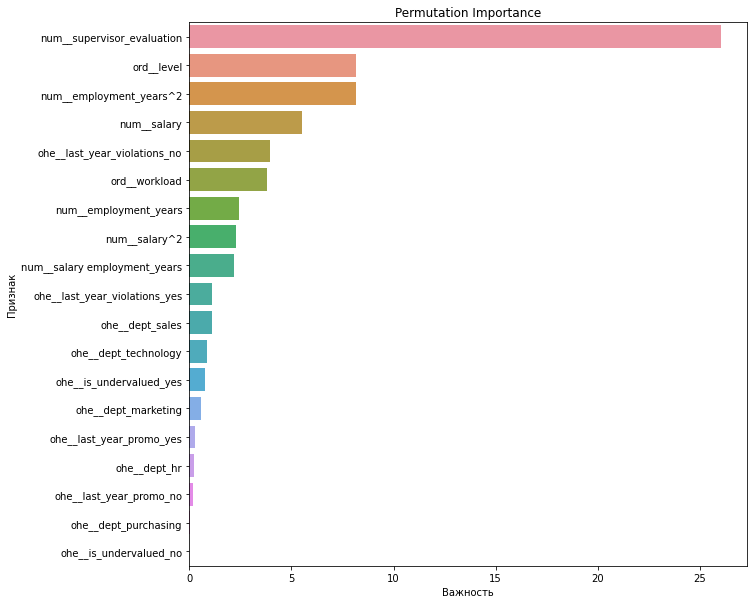

In [ ]:
best_pipe = rs.best_estimator_
preprocessor = best_pipe.named_steps['preprocessor']
final_model = best_pipe.named_steps['models']

# обрабатываем тестовые данные
X_test_1 = preprocessor.transform(X_test)
# получаем названия колонок
processed_feature_names = preprocessor.get_feature_names_out()

# вычисляем permutation_importance
result_1 = permutation_importance(
    final_model,              
    X_test_1,          
    y_test,
    scoring=smape_scorer,
    n_repeats=10,
    random_state=RANDOM_STATE
)

feature_importance = pd.DataFrame({
    'Feature': processed_feature_names, 
    'Importance': result_1.importances_mean
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(28)

# визуализация
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Permutation Importance')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

Наиболее **значимые признаки** для модели:
- оценка руководителя (значимость признака в разы превышает остальные)

Возможно, низкая оценка руководителя сильно влияет на самооценку, мотивацию сотрудников и, как следствие, приводит к низкой удовлетворенности работой. Любые негативные или позитивные изменения в этом параметре будут сильнее всего сказываться на итоговой удовлетворенности. Это очень важная информация для HR-отдела.

- уровень должности

Из исследовательского анализа мы помним, что самые неудовлетворенные - это джуны и сеньоры.

- длительность работы в компании в квадрате

Это говорит о том, что зависимость нелинейная.

- зарплата

Высокий доход увеличивает вероятность того, что сотрудник будет доволен работой

- нарушал ли сотрудник трудовой договор,

Наша гипотеза о том, что нарушения тесно связаны с удовлетворенностью, подтвердилась. Это важный сигнал для HR-отдела: если сотрудник нарушает правила, он, скорее всего, недоволен.

Интересно, что зарплата важна, но не  так, как оценка, грейд и стаж. Это важный вывод HR-аналитики: деньги мотивируют, но не являются единственным и главным фактором удовлетворенности работой. Отношения с руководителем и карьерный путь важнее.

**Наименее значимыми** для модели оказались признаки:
- принадлежность к отделу (специфика отдела в данных заметна несильно),
- было ли повышение за последний год

Удивительно, но что этот признак оказался внизу. Повышение получили всего 3% сотрудников - возможно, для модели эта выборка оказалась слишком маленькой.

- был ли сотрудник недооценен

Вероятно, закономернось, которую мы планировали передать модели, она нашла и сама с помощью других признаков.

Вклад новых признаков:
- создание полиномиальных признаков внесло положительный вклад в обучение модели,
- выделение категории недооцененных не дало модели новой информации, этот признак оказался избыточным.

## Часть 2. Предсказание увольнения сотрудника

### Знакомство с данными

In [ ]:
try:
    train_df_quit = pd.read_csv('/datasets/train_quit.csv')
    print("Данные успешно загружены")
    display(train_df_quit.head())
    train_df_quit.info()
    
except:
    print("Ошибка загрузки данных")

Данные успешно загружены


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [ ]:
try:
    test_df_features_quit = pd.read_csv('/datasets/test_features.csv')
    print("Данные успешно загружены")
    display(test_df_features_quit.head())
    test_df_features_quit.info()
    
except:
    print("Ошибка загрузки данных")

Данные успешно загружены


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [ ]:
try:
    test_df_target_quit = pd.read_csv('/datasets/test_target_quit.csv')
    print("Данные успешно загружены")
    display(test_df_target_quit.head())
    test_df_target_quit.info()
    
except:
    print("Ошибка загрузки данных")

Данные успешно загружены


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Что можно сказать о данных:

- есть пропуски в test_df_features_quit,
- формат данных соответствует содержанию столбцов,
- названия столбцов унифицированы и не отличаются от файла к файлу.

### Предобработка данных

#### Пропуски

In [ ]:
# выведем строки, где есть пропуски
display(test_df_features_quit[test_df_features_quit.isna().any(axis=1)])

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


In [ ]:
# проверим, какие самые частые значения в целом у этих столбцов
print('Мода для столбца level:', test_df_features_quit['level'].mode()[0])
print('Мода для столбца dept:', test_df_features_quit['dept'].mode()[0])

Мода для столбца level: junior
Мода для столбца dept: sales


Заполним пропуски общей модой по столбцу с помощью SimpleImputer в пайплайне, когда будем предобрабатывать данные для обучения модели. 

#### Дубликаты

**Явные дубликаты**

In [ ]:
display('Дубликатов в train_df_quit', train_df_quit.duplicated().sum())
display('Дубликатов в test_df_features_quit', test_df_features_quit.duplicated().sum())

'Дубликатов в train_df_quit'

0

'Дубликатов в test_df_features_quit'

0

Явных дубликатов нет.

**Неявные дубликаты**

In [ ]:
# проверяем на неявные дубликаты датафрейм train_df_quit
cat_columns = [
    'level', 
    'dept',
    'workload', 
    'last_year_promo', 
    'last_year_violations',
    'quit'
]

for column in cat_columns:
    print(column)
    print(train_df_quit[column].value_counts())
    print("-" * 30)

level
junior    1949
middle    1694
sinior     357
Name: level, dtype: int64
------------------------------
dept
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64
------------------------------
workload
medium    2118
low       1208
high       674
Name: workload, dtype: int64
------------------------------
last_year_promo
no     3887
yes     113
Name: last_year_promo, dtype: int64
------------------------------
last_year_violations
no     3455
yes     545
Name: last_year_violations, dtype: int64
------------------------------
quit
no     2872
yes    1128
Name: quit, dtype: int64
------------------------------


In [ ]:
# проверяем на неявные дубликаты датафрейм test_df_features_quit
cat_columns = [
    'level', 
    'dept',
    'workload', 
    'last_year_promo', 
    'last_year_violations'
]

for column in cat_columns:
    print(column)
    print(test_df_features_quit[column].value_counts())
    print("-" * 30)

level
junior    974
middle    854
sinior    171
Name: level, dtype: int64
------------------------------
dept
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64
------------------------------
workload
medium    1043
low        593
high       363
             1
Name: workload, dtype: int64
------------------------------
last_year_promo
no     1937
yes      63
Name: last_year_promo, dtype: int64
------------------------------
last_year_violations
no     1738
yes     262
Name: last_year_violations, dtype: int64
------------------------------


In [ ]:
# проверяем на неявные дубликаты датафрейм test_df_target_quit
print(test_df_target_quit['quit'].value_counts())

no     1436
yes     564
Name: quit, dtype: int64


В test_df_features_quit в столбцах workload и dept есть пустые значения. Их обработает кодировщик в пайплайне.

In [ ]:
# # oчищаем столбец 'dept' от значения, состоящего из пробелов
# test_df_features_quit['dept'] = test_df_features_quit['dept'].replace(r'^\s*$', np.nan, regex=True)
# test_df_features_quit['workload'] = test_df_features_quit['workload'].replace(r'^\s*$', np.nan, regex=True)

# print(test_df_features_quit['dept'].value_counts())
# print('-' * 30)
# print(test_df_features_quit['workload'].value_counts())

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

### Исследовательский анализ данных

#### Количественные признаки

In [ ]:
train_df_gone = train_df_quit[train_df_quit['quit'] == 'yes']
train_df_stayed = train_df_quit[train_df_quit['quit'] == 'no']

display('Описание данных по ушедшим', train_df_gone.describe())
display('Описание данных по оставшимся', train_df_stayed.describe())

'Описание данных по ушедшим'

,id,employment_years,supervisor_evaluation,salary
count,1128.000000,1128.000000,1128.000000,1128.000000
mean,544544.457447,1.844858,3.046099,23885.106383
std,258059.498361,1.274920,0.973291,9351.599505
min,100222.000000,1.000000,1.000000,12000.000000
25%,325073.000000,1.000000,3.000000,16800.000000
50%,545003.500000,1.000000,3.000000,22800.000000
75%,756296.000000,2.000000,4.000000,27600.000000
max,999158.000000,10.000000,5.000000,79200.000000


'Описание данных по оставшимся'

,id,employment_years,supervisor_evaluation,salary
count,2872.000000,2872.000000,2872.000000,2872.000000
mean,555066.499652,4.430710,3.643106,37702.228412
std,260962.518935,2.544635,0.965295,15218.977339
min,100469.000000,1.000000,1.000000,12000.000000
25%,329560.500000,2.000000,3.000000,25200.000000
50%,548319.500000,4.000000,4.000000,34800.000000
75%,793533.500000,6.000000,4.000000,46800.000000
max,999915.000000,10.000000,5.000000,96000.000000


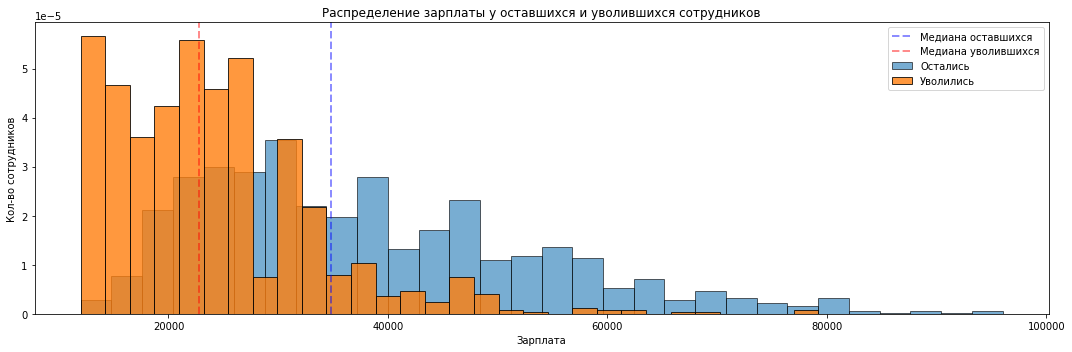

In [ ]:
# построим гистограмму для анализа непрерывных признаков
plt.figure(figsize=(15, 5))
plt.hist(train_df_stayed['salary'], bins=30, edgecolor='black', alpha=0.6, density=True, label='Остались')
plt.hist(train_df_gone['salary'], bins=30, edgecolor='black', alpha=0.8, density=True, label='Уволились')
plt.axvline(train_df_stayed['salary'].median(), 
         color='blue', 
         alpha=0.45, 
         linestyle='--', 
         linewidth=2, 
         label=f'Медиана оставшихся')
plt.axvline(train_df_gone['salary'].median(), 
         color='red', 
         alpha=0.45, 
         linestyle='--', 
         linewidth=2, 
         label=f'Медиана уволившихся')
plt.title('Распределение зарплаты у оставшихся и уволившихся сотрудников')
plt.xlabel('Зарплата')
plt.ylabel('Кол-во сотрудников')
plt.legend()
        
plt.tight_layout()
plt.show()

Зарплата

Зарплата уволившихся и оставшихся различается в среднем в 1.6 раз. Среди оставшихся в разы меньше сотрудников, которые получают минимальную зарплату (меньше 20000). Возможно, среди уволившихся больше сотрудников с низкой квалификацией или начинающих специалистов. Или же компания предлагает на старте зарплату ниже рыночной, и как только джуны получают первый опыт, они уходят туда, где платят больше.

#### Категориальные  признаки

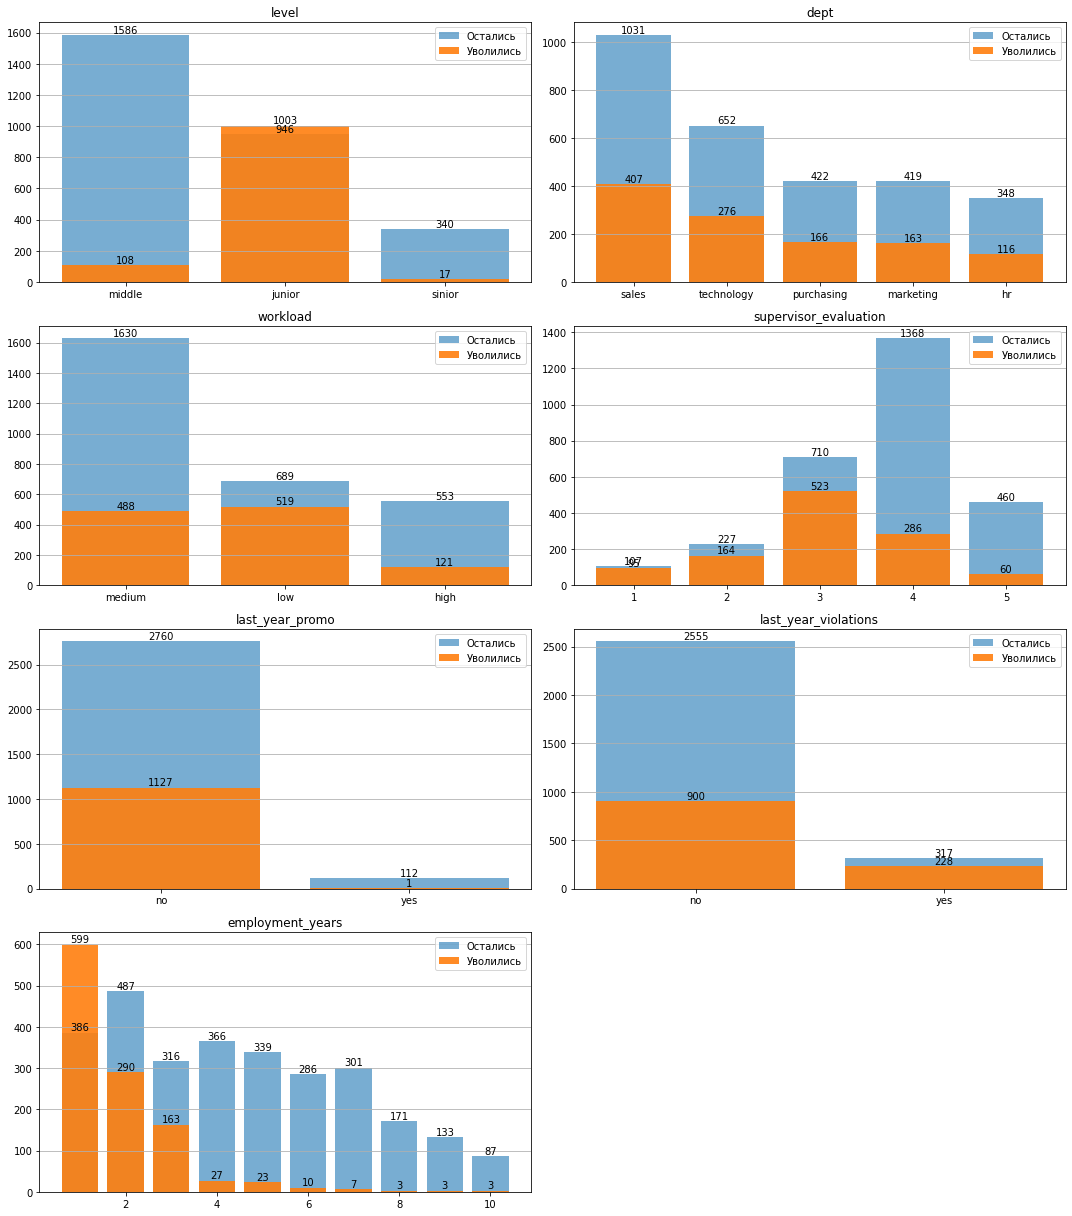

In [ ]:
# построим столбчатую диаграмму для анализа количественных признаков
discr_columns = [
    'level', 
    'dept',
    'workload', 
    'supervisor_evaluation',
    'last_year_promo', 
    'last_year_violations',
    'employment_years'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 17))

axes = axes.flatten()

for i, column in enumerate(discr_columns):
    ax = axes[i]
    bar_data1 = train_df_stayed[column].value_counts()
    bar_data2 = train_df_gone[column].value_counts()
    ax.bar(bar_data1.index, bar_data1.values, alpha=0.6, label='Остались')
    for index, value in zip(bar_data1.index, bar_data1.values):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
    ax.bar(bar_data2.index, bar_data2.values, alpha=0.9, label='Уволились')
    for index, value in zip(bar_data2.index, bar_data2.values):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
    ax.set_title(column)
    ax.tick_params(axis='x')
    ax.grid(axis='y')
    ax.legend()
    if len(discr_columns) < len(axes):
        axes[-1].set_visible(False)
        
plt.tight_layout()
plt.show()


1. Уровень должности.

Как мы и предполагали, большая часть уволившихся сотрудников (89% от всех уволившихся) - это начинающие специалисты, мидлы составляют 10%, а сеньоры - всего 1%. Среди оставшихся джуны составляют всего 33%, мидлы - 55% (составляют костяк остающихся), а сеньоры - 12%.

Мы видим, что самая стабильная категория сотрудников - это мидлы и сеньоры: они увольняются реже всего (6% и 5% от общего числа сотрудников своего уровня). Видимо, это те, кто пережил период разочарования в компании и сумел приспособиться к существующим реалиям. 

2. Отделы.

Доля уволившихся внутри отделов:
- sales - 28%, 
- technology - 30%,
- purchasing - 28%,
- marketing - 28%,
- hr - 36%.

Самый высокий уровень увольнений в отделе персонала. Возможно, сотрудники этого отдела устали от постоянной текучки и необходимости искать новых сотрудников. Очевидно, компания делает упор именно на эту их функцию, а не на разработку стратегий удержания сотрудников, что приводит к перегрузке и выгоранию hr-менеджеров.

Отдел technology тоже показывает повышенный уровень увольнений (30%) по сравнению с "бизнес-отделами" (sales, purchasing, marketing 28%). Возможно, в IT-отделе есть свои специфические проблемы.

3. Загруженность сотрудников.

Как ни странно, самая большая доля уволившихся (43%) - это сотрудники с низкой нагрузкой. Сильно загруженные сотрудники увольняются реже всего (18%), что довольно парадоксально. Это подтверждает нашу гипотезу о группе "выгоревших". Они не перегружены работой, они, скорее всего, потеряли мотивацию, тихо саботируют задачи (низкая загрузка) и активно ищут новую работу.

4. Оценка качества работы сотрудника от руководителя.

Доля уволившихся по оценкам:
- 1 - почти 100%
- 2 - 42%
- 3 - 42%
- 4 - 17%
- 5 - 12%

Оценка руководителя очень хорошо предсказывает увольнения. Сотрудники с оценками "1", "2" и "3" находятся в зоне риска. Как только оценка достигает "4", вероятность увольнения падает более чем в два раза.

5. Получили повышение за последний год.

Это самый показательный график.
- Не получили повышение - 29% уввольнений
- Получили повышение - 0.9%

Повышение - это почти 100% гарантия удержания сотрудника в компании на ближайший год. Отсутствие повышения - один из ключевых факторов, подталкивающих к увольнению почти треть из тех, кто его не получил.

6. Нарушение трудового договора.

- Не было нарушений - 26%
- Были нарушения - 42%

Сотрудники, имевшие нарушения, увольняются значительно чаще. Это работает в обе стороны: возможно, они нарушают, потому что уже не дорожат работой и собираются уходить, или же последствия нарушения становятся последней каплей.

7. Длительность работы в компании

Большая часть всех уволившихся увольняется в первый год работы: медиана длительности работы в этой группе - 1 год, в то время как у оставшихся работать медиана - 4 года. Высокая доля уволившихся  сохраняется еще на протяжении следующих 2 лет, а потом резко падает. Это может говорить о системных проблемах адаптации новичков в компании.

#### Портрет уволившегося сотрудника

Сотрудник, который с большой вероятностью скоро уволится, - начинающий специалист (junior), который получил низкую или среднюю оценку от руководителя (1-3 балла), имеет низкую рабочую загрузку, не получал повышения за последний год и, возможно, имел дисциплинарные нарушения. Скорее всего, он из отдела продаж или технологий и его зарплата в среднем около 23000 рублей

#### Связь увольнений с уровнем удовлетворенности

In [ ]:
# сортируем тестовые данные (входные и целевой признаки отдельно) по id
test_df_quit_stsf = test_df_features_quit.copy()
test_df_quit_stsf = test_df_quit_stsf.sort_values(by='id')
test_df_target_quit = test_df_target_quit.sort_values(by='id')

# сбрасываем индексы для объединения тестовых данных из этой части с данными об удовлетвореннности из прошлой части
test_df_quit_stsf = test_df_quit_stsf.reset_index(drop=True)
target_series = test_df_target['job_satisfaction_rate'].reset_index(drop=True)
test_quit = test_df_target_quit.reset_index(drop=True)

# добавляем столбец с уровнем удовлетворенности
test_df_quit_stsf['job_satisfaction_rate'] = target_series

# добавляем столбец с информацией об увольнении
test_df_quit_stsf['quit'] = test_quit['quit']

display(test_df_quit_stsf.head())
display(test_df_quit_stsf.info())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,100298,hr,junior,low,2,no,no,4,19200,0.80,no
1,100480,marketing,junior,low,4,no,no,4,16800,0.84,no
2,100503,purchasing,middle,high,5,no,no,4,55200,0.79,no
3,100610,sales,middle,medium,5,no,no,4,43200,0.75,no
4,100692,sales,middle,high,6,no,no,4,48000,0.69,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
 10  quit                   2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


None

In [ ]:
# сравним уровень удовлетворенности среди ушедших и оставшихся
stsf_stayed_df = test_df_quit_stsf[test_df_quit_stsf['quit'] == 'no']
stsf_lefted_df = test_df_quit_stsf[test_df_quit_stsf['quit'] == 'yes']

display(stsf_stayed_df.describe())
display(stsf_lefted_df.describe())

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,548680.699164,4.33078,3.716574,37645.403900,0.612040
std,254730.637881,2.54080,0.958965,15503.475156,0.199367
min,100298.000000,1.00000,1.000000,12000.000000,0.030000
25%,327477.750000,2.00000,3.000000,25200.000000,0.500000
50%,546372.000000,4.00000,4.000000,33600.000000,0.660000
75%,761578.500000,6.00000,4.000000,48000.000000,0.760000
max,998900.000000,10.00000,5.000000,96000.000000,1.000000


,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,563164.792553,1.975177,3.042553,24955.319149,0.387713
std,251523.775926,1.552888,0.926211,10650.300744,0.185784
min,103221.000000,1.000000,1.000000,12000.000000,0.040000
25%,358969.500000,1.000000,3.000000,18000.000000,0.240000
50%,554657.000000,1.000000,3.000000,22800.000000,0.370000
75%,781640.250000,2.000000,4.000000,30000.000000,0.492500
max,999029.000000,10.000000,5.000000,80400.000000,0.970000


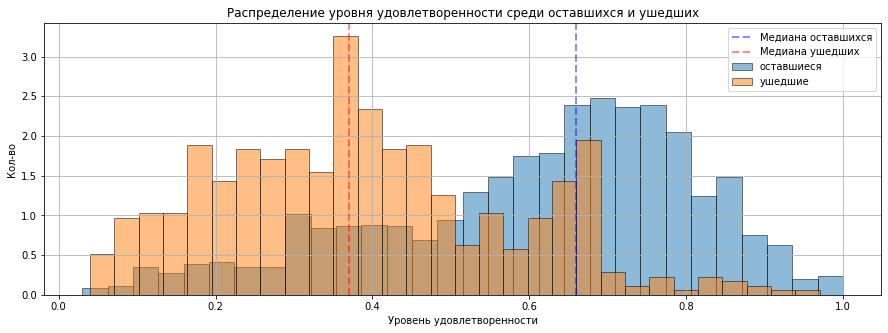

Медиана удовлетворенности оставшихся 0.66
Медиана удовлетворенности ушедших 0.37


In [ ]:
# построим график распределения внутри каждой группы
# нормализуем данные для сравнения
plt.figure(figsize=(15, 5))
plt.hist(stsf_stayed_df['job_satisfaction_rate'], bins=30, alpha=0.5, label='оставшиеся', density=True, edgecolor='black')
plt.hist(stsf_lefted_df['job_satisfaction_rate'], bins=30, alpha=0.5, label='ушедшие', density=True, edgecolor='black')

plt.axvline(stsf_stayed_df['job_satisfaction_rate'].median(), 
         color='blue', 
         alpha=0.45, 
         linestyle='--', 
         linewidth=2, 
         label=f'Медиана оставшихся')
plt.axvline(stsf_lefted_df['job_satisfaction_rate'].median(), 
         color='red', 
         alpha=0.45, 
         linestyle='--', 
         linewidth=2, 
         label=f'Медиана ушедших')

plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Кол-во')
plt.title('Распределение уровня удовлетворенности среди оставшихся и ушедших')
plt.grid()
plt.legend()
plt.show()

print('Медиана удовлетворенности оставшихся', stsf_stayed_df['job_satisfaction_rate'].median())
print('Медиана удовлетворенности ушедших', stsf_lefted_df['job_satisfaction_rate'].median())

Уровень удовлетворенности ушедших и оставшихся в тестовой выборке различается довольно сильно (медиана удовлетворенности ушедших - 0.37 VS 0.66 у оставшихся).

Удовлетворенность внутри группы оставшихся распределена практически нормально и смещено влево (медиана 0.66 > среднего 0.61). Таким образом, мы видим, что большинство остающихся сотрудников относятся к категории "довольных" - это вполне логично.

Удовлетворенность внутри группы уволившихся распределена практически зеркально относительно оставшихся: нормальное распределение со смещением вправо (среднее 0.39 > медианы 0.37). Но есть одна особенность: пик около значения примерно 0.7. То есть внутри группы уволившихся есть довольно большая подгруппа, которая довольна работой.

Почему так происходит? Решение уйти, наиболее вероятно, складывается не только из удовлетворенности работой, но и из личностных качеств (есть более решительные и амбициозные - они уходят быстро, а есть те, кто на нелюбимой работе может сидеть годами), из семейных обстоятельств (например, человек взял ипотеку и ему нужна зарплата больше), из отношений с коллегами и руководством и из психологического состояния (выгорание, депрессия).

Потеря "довольных" сотрудников - самое болезненное для компании, так как уходят хорошие мотивированные кадры.

### Добавление нового входного признака

Чтобы сделать предсказания на тренировочной выборке, нам сначала нужно добавить в датафрейм признаки, которые мы использовали при обучении модели. Сразу сделаем это и для тестовой выборки, так как нам пригодятся новые признаки для обучения новой модели.

In [ ]:
train_df_quit_stsf = train_df_quit.copy()

# добавляем признак 'is_undervalued' в тренировочную выборку
train_df_quit_stsf['is_undervalued'] = 'no'
train_df_quit_stsf.loc[
    (train_df_quit_stsf['supervisor_evaluation'] >= 4) & 
    (train_df_quit_stsf['last_year_promo'] == 'no'), 'is_undervalued'] = 'yes'

# добавляем признак 'is_undervalued' в тестовую выборку
test_df_quit_stsf['is_undervalued'] = 'no'
test_df_quit_stsf.loc[
    (test_df_quit_stsf['supervisor_evaluation'] >= 4) & 
    (test_df_quit_stsf['last_year_promo'] == 'no'), 'is_undervalued'] = 'yes'

display(train_df_quit_stsf.head())
display(test_df_quit_stsf.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,is_undervalued
0,723290,sales,middle,high,2,no,no,4,54000,no,yes
1,814010,sales,junior,medium,2,no,no,4,27600,no,yes
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,no
4,910140,marketing,junior,medium,2,no,no,5,25200,no,yes


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit,is_undervalued
0,100298,hr,junior,low,2,no,no,4,19200,0.80,no,yes
1,100480,marketing,junior,low,4,no,no,4,16800,0.84,no,yes
2,100503,purchasing,middle,high,5,no,no,4,55200,0.79,no,yes
3,100610,sales,middle,medium,5,no,no,4,43200,0.75,no,yes
4,100692,sales,middle,high,6,no,no,4,48000,0.69,no,yes


In [ ]:
# добавим признаки с помощью полиномизации
num_columns = ['salary', 'employment_years']
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_train = poly.fit_transform(train_df_quit_stsf[num_columns])
poly_test = poly.transform(test_df_quit_stsf[num_columns])

# сохраним таблицы с полиномиальными признаками
poly_train_df = pd.DataFrame(poly_train,columns = poly.get_feature_names_out())
poly_test_df = pd.DataFrame(poly_test,columns = poly.get_feature_names_out())

train_df = pd.concat([poly_train_df, train_df_quit_stsf.drop(columns=num_columns)], axis=1)
test_df = pd.concat([poly_test_df, test_df_quit_stsf.drop(columns=num_columns)], axis=1)

# проверим, все ли столбцы на месте
display(train_df.head())
display(test_df.head())

,salary,employment_years,salary^2,salary employment_years,employment_years^2,id,dept,level,workload,last_year_promo,last_year_violations,supervisor_evaluation,quit,is_undervalued
0,54000.0,2.0,2.916000e+09,108000.0,4.0,723290,sales,middle,high,no,no,4,no,yes
1,27600.0,2.0,7.617600e+08,55200.0,4.0,814010,sales,junior,medium,no,no,4,no,yes
2,37200.0,5.0,1.383840e+09,186000.0,25.0,155091,purchasing,middle,medium,no,no,1,no,no
3,24000.0,2.0,5.760000e+08,48000.0,4.0,257132,sales,junior,medium,no,yes,3,yes,no
4,25200.0,2.0,6.350400e+08,50400.0,4.0,910140,marketing,junior,medium,no,no,5,no,yes


,salary,employment_years,salary^2,salary employment_years,employment_years^2,id,dept,level,workload,last_year_promo,last_year_violations,supervisor_evaluation,job_satisfaction_rate,quit,is_undervalued
0,19200.0,2.0,3.686400e+08,38400.0,4.0,100298,hr,junior,low,no,no,4,0.80,no,yes
1,16800.0,4.0,2.822400e+08,67200.0,16.0,100480,marketing,junior,low,no,no,4,0.84,no,yes
2,55200.0,5.0,3.047040e+09,276000.0,25.0,100503,purchasing,middle,high,no,no,4,0.79,no,yes
3,43200.0,5.0,1.866240e+09,216000.0,25.0,100610,sales,middle,medium,no,no,4,0.75,no,yes
4,48000.0,6.0,2.304000e+09,288000.0,36.0,100692,sales,middle,high,no,no,4,0.69,no,yes


In [ ]:
# предскажем признак job_satisfaction_rate на тренировочной выборке
train_df_pred = train_df.drop('quit', axis=1)
stsf_pred = rs.predict(train_df_pred)

# добавим новый признак в тренировочный датафрейм
train_df['job_satisfaction_rate'] = stsf_pred

display(train_df.head())

,salary,employment_years,salary^2,salary employment_years,employment_years^2,id,dept,level,workload,last_year_promo,last_year_violations,supervisor_evaluation,quit,is_undervalued,job_satisfaction_rate
0,54000.0,2.0,2.916000e+09,108000.0,4.0,723290,sales,middle,high,no,no,4,no,yes,0.601169
1,27600.0,2.0,7.617600e+08,55200.0,4.0,814010,sales,junior,medium,no,no,4,no,yes,0.824000
2,37200.0,5.0,1.383840e+09,186000.0,25.0,155091,purchasing,middle,medium,no,no,1,no,no,0.494762
3,24000.0,2.0,5.760000e+08,48000.0,4.0,257132,sales,junior,medium,no,yes,3,yes,no,0.333750
4,25200.0,2.0,6.350400e+08,50400.0,4.0,910140,marketing,junior,medium,no,no,5,no,yes,0.794667


### Подготовка данных

Создадим пайплайн для обработки данных.

In [ ]:
# разбиваем данные
X_train  = train_df.drop(['id','quit', 'is_undervalued', 'dept', 'last_year_promo', 'last_year_violations'], axis=1)
y_train = train_df['quit']
X_test = test_df.drop(['id', 'quit', 'is_undervalued', 'dept', 'last_year_promo', 'last_year_violations'], axis=1)
y_test = test_df['quit']

# создаём списки с названиями признаков
# ohe_columns = ['last_year_violations']
ord_columns = ['level', 'workload']
num_columns = [
    'salary', 
    'employment_years',
    'salary^2', 
    'salary employment_years',
    'employment_years^2',
    'supervisor_evaluation',
    'job_satisfaction_rate'
]

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)


### Обучение модели

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 10),
        'models__max_features': range(4, 10),
        'models__min_samples_leaf': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(3, 17, 2),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': [0.01, 0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE, 
            probability=True 
        )],
        'models__C': [0.01, 0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
]

# запускаем поиск
rs_2 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=60
)
rs_2.fit(X_train, y_train)
print("Лучший результат модели:", rs_2.best_score_)

Лучший результат модели: 0.9303313708047872


In [ ]:
# проверим визуально, все ли в порядке с данными после кодирования и масштабирования
X_train_processed_2 = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)    

X_test_processed_2 = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 
    
display(X_train_processed_2.head())
display(X_test_processed_2.head())

,ord__level,ord__workload,num__salary,num__employment_years,num__salary^2,num__salary employment_years,num__employment_years^2,num__supervisor_evaluation,num__job_satisfaction_rate
0,1.0,2.0,1.332905,-0.669477,1.198745,-0.248673,-0.662319,0.523197,0.302447
1,0.0,1.0,-0.409610,-0.669477,-0.474185,-0.621795,-0.662319,0.523197,1.349805
2,1.0,1.0,0.224032,0.510912,0.008907,0.302530,0.198341,-2.465078,-0.197690
3,0.0,1.0,-0.647225,-0.669477,-0.618442,-0.672675,-0.662319,-0.472895,-0.954484
4,0.0,1.0,-0.568020,-0.669477,-0.572593,-0.655715,-0.662319,1.519289,1.211932


,ord__level,ord__workload,num__salary,num__employment_years,num__salary^2,num__salary employment_years,num__employment_years^2,num__supervisor_evaluation,num__job_satisfaction_rate
0,0.0,0.0,-0.964046,-0.669477,-0.779472,-0.740515,-0.662319,0.523197,1.237000
1,0.0,0.0,-1.122456,0.117449,-0.846568,-0.536994,-0.170513,0.523197,1.425009
2,1.0,2.0,1.412110,0.510912,1.300507,0.938533,0.198341,0.523197,1.189997
3,1.0,1.0,0.620058,0.510912,0.383527,0.514531,0.198341,0.523197,1.001988
4,1.0,2.0,0.936879,0.904375,0.723481,1.023333,0.649163,0.523197,0.719974


In [ ]:
print('Лучшая модель и её параметры:\n\n', rs_2.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'sinior'],
                                                                                              ['low',
                                                                                               'medium',
                 

In [ ]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred_2 = rs_2.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_2)}')

Метрика ROC-AUC на тестовой выборке: 0.9130304332365315


In [ ]:
# сохраним результаты всех вариаций в таблицу
result_quit = pd.DataFrame(rs_2.cv_results_)
display(result_quit)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_leaf,param_models__max_features,param_models__max_depth,param_models,param_models__C,param_models__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020638,0.006925,0.007859,0.000502,StandardScaler(),5,5,7,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.919950,0.928846,0.919221,0.923410,0.924729,0.923231,0.003483,28
1,0.017524,0.000645,0.007659,0.000545,MinMaxScaler(),7,8,7,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.921797,0.925082,0.907831,0.929227,0.945746,0.925937,0.012239,11
2,0.015995,0.000593,0.007017,0.000294,StandardScaler(),3,4,7,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.908039,0.918443,0.923422,0.923765,0.939375,0.922609,0.010127,36
3,0.015065,0.003553,0.007015,0.001491,passthrough,4,7,5,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': 'passthrough', 'models__...",0.914319,0.919795,0.928941,0.914461,0.936696,0.922843,0.008733,33
4,0.014581,0.002858,0.005942,0.000478,passthrough,3,5,7,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': 'passthrough', 'models__...",0.923432,0.921975,0.919298,0.930487,0.919741,0.922987,0.004040,31
5,0.017628,0.002065,0.008734,0.001886,StandardScaler(),3,5,7,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.923459,0.921975,0.919298,0.930487,0.919741,0.922992,0.004041,30
6,0.018480,0.000621,0.007212,0.000232,RobustScaler(),9,8,5,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': RobustScaler(), 'models_...",0.923053,0.918354,0.925580,0.926937,0.944922,0.927769,0.009062,7
7,0.015681,0.000165,0.007142,0.000108,MinMaxScaler(),5,5,6,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.926852,0.928100,0.918620,0.913524,0.913374,0.920094,0.006329,47
8,0.018602,0.000523,0.007269,0.000160,RobustScaler(),7,6,8,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': RobustScaler(), 'models_...",0.926632,0.921511,0.913509,0.926417,0.943106,0.926235,0.009686,10
9,0.014653,0.000416,0.006131,0.000168,passthrough,9,8,7,"DecisionTreeClassifier(max_depth=6, max_featur...",NaN,NaN,"{'preprocessor__num': 'passthrough', 'models__...",0.919331,0.924359,0.918901,0.921757,0.943819,0.925634,0.009300,12


### Переобучение модели

Сначала на тестовых данных модель показала ROC-AUC 0.895, хотя на тренировочной выборке ROC-AUC был 0.93. Очевидно, модель переобучилась. С помощью Permutation Importance удалось выяснить, что хуже всего на обучение модели влияли следующие признаки:
- is_undervalued,
- dept,
- last_year_promo,
- last_year_violations.

Удалим их и обучим модель заново.

### Выводы

**Лучшая модель**

Лучше всех показала себя модель DecisionTreeClassifier с параметрамии:
- max_depth=6, 
- max_features=9,
- min_samples_leaf=9

Ее метрики качества:
- ROC-AUC на тренировочной выборке: 0.93
- ROC-AUC на тестовой выборке: 0.91

Почему победила модель Дерево решений?

Дерево решений хорошо находит нелинейные зависимости и взаимодействия между признаками. А, например, логистическая регрессия плохо улавливает такого рода связи в даннных, поэтому эта модель справилась хуже. Вероятно, в наших данных были именно такие сложные, нелинейные правила, которые дерево увидело лучше всех.

Плюс в данных было много бинарных и порядковых признаков, которые хорошо вписываются в древовидную структуру.

Оценим важность признаков с помощью метода **Permutation Importance**.

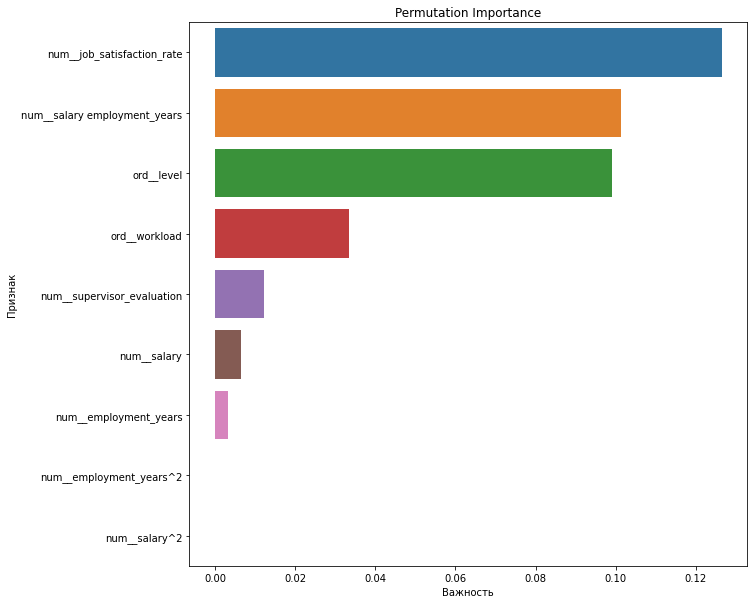

In [ ]:
best_pipe_2 = rs_2.best_estimator_
preprocessor_2 = best_pipe_2.named_steps['preprocessor']
final_model_2 = best_pipe_2.named_steps['models']

# обрабатываем тестовые данные
X_test_2 = preprocessor_2.transform(X_test)
# получаем названия колонок
processed_feature_names_2 = preprocessor_2.get_feature_names_out()

# вычисляем permutation_importance
result_2 = permutation_importance(
    final_model_2,              
    X_test_2,          
    y_test,
    scoring='roc_auc',
    n_repeats=10,
    random_state=RANDOM_STATE
)

feature_importance_2 = pd.DataFrame({
    'Feature': processed_feature_names_2, 
    'Importance': result_2.importances_mean
})
feature_importance_2 = feature_importance_2.sort_values('Importance', ascending=False).head(28)

# визуализация
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_2)
plt.title('Permutation Importance')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

Самые **важные признаки** для победившей модели:

- job_satisfaction_rate

Удовлетворенность - это не просто еще один признак, это промежуточный результат, который аккумулирует в себе влияние множества других факторов (оценки руководителя, зарплаты, стажа). Именно поэтому он оказался таким значимым для модели.

- salary employment_years

Взаимодействие признаков "зарплата" и "длительность работы" оказалось важнее, чем каждый признак по отдельности. Как мы помни из исследовательского анализа, увольняются чаще всего сотрудники с низкой зарплатой в первые 3 года. "Старожил" с низкой зарплатой - тоже прямой кандидат на увольнение. Видимо, модель увидела в этом взаимодействии много подсказок.

- level

Согласно нашему анализу, примерно половина всех джунов в итоге увольняется. Этот факт, скорее всего, тоже значительно повлиял на обучение модели.

- workload

Во время исследовательского анализа мы заметили, что бОльшая часть уволившихся - это "выгоревшие" сотрудники с низкой нагрузкой.

- supervisor_evaluation

Отношения с начальством и его оценка тоже являются важным фактором в выборе сотрудника уйти или остаться. В прошлой модели это был главный признак, который влиял на удовлетворенность работой, однако в этот раз модель, видимо, вычитала эти данные из самого признака удовлетворенности, а сама оценка оказалась менее информативной.


Самые **незначимые признаки**:
- зарплата и длительность работы в квадрате (видимо, линейных связей обычных признаков ей оказалось достаточно)

## Общие выводы

1. **Описание задачи**

Были поставлены две ключевые задачи:
- Создать модель, прогнозирующую уровень удовлетворённости сотрудника - job_satisfaction_rate (задача регрессии, часть 1).
- Создать модель, предсказывающую вероятность увольнения сотрудника - quit (задача классификации, часть 2).

Главная **цель проекта** — предоставить HR-отделу аналитический инструмент для эффективного управления персоналом, позволяющий выявлять сотрудников в зоне риска, понимать причины их неудовлетворенности и предотвращать отток ценных кадров.

2. **Этапы работы**

**Исследовательский анализ. Часть 1**

Мы детально изучили данные, визуализировали распределения и сформулировали несколько важных наблюдений:
- высокая текучесть кадров в первые 3 года работы (говорит о системных проблемах с адаптацией новых сотрудников).
- многомодальное распределение удовлетворённости, указывающее на наличие трёх разных групп сотрудников ("выгоревшие". "нейтральные", "довольные").
- сильная диспропорция в должностях (много junior, мало senior), что говорит о перегруженности старших специалистов.
- явная связь между нарушениями трудового договора и низкой удовлетворенностью.
- всего 3% сотрудников получили повышение за последний год, что говорит о невыстроенной системе мотивации профессионального роста.
- сеньоры и джуны - самые "недовольные" сотрудники

**Исследовательский анализ. Часть 2**

Сотрудник, который с большой вероятностью скоро уволится, - начинающий специалист (junior), который получил низкую или среднюю оценку от руководителя (1-3 балла), имеет низкую рабочую загрузку, не получал повышения за последний год и, возможно, имел дисциплинарные нарушения. Работает в компании 1-3 года. Скорее всего, он из отдела продаж или технологий и его зарплата в среднем около 23000 рублей.

Анализ уволившихся показал, что компанию покидают не только недовольные сотрудники. Существует значительная группа уволившихся с высоким уровнем удовлетворенности. Это самые болезненные потери, так как уходят мотивированные и эффективные кадры, которых, вероятно, переманили конкуренты, предложив лучшие условия или карьерный рост.

**Подготовка данных и создание признаков**

Была проведена тщательная подготовка данных для моделей:
- Категориальные признаки были закодированы с помощью OrdinalEncoder (для признаков с иерархией, как level) и OneHotEncoder (для номинальных, как dept).
- Количественные признаки были масштабированы с помощью RobustScaler, MinMaxScaler и StandardScaler
- Были созданы новые признаки: полиномиальные (salary^2, employment_years^2) и сложные (salary_employment_years), которые помогли моделям лучше улавливать нелинейные зависимости.

**Обучение и выбор моделей**

Модель для предсказания уровня удовлетворенности - DecisionTreeRegressor, достигшая метрики SMAPE 14.59 на тестовой выборке.

Модель для предсказания увольнения - DecisionTreeClassifier, показавшая метрику ROC-AUC 0.91 на тестовой выборке.

**Интерпретация результатов** 

С помощью метода Permutation Importance мы проанализировали, какие факторы оказались наиболее важными для моделей, что позволило подтвердить и углубить выводы исследовательского анализа:

- Человеческий фактор оказался решающим 

Главным предиктором удовлетворённости является оценка руководителя (supervisor_evaluation), а удовлетворенность, в свою очередь, предсказывает увольнение. Поэтому отношения с непосредственным начальником и его оценка работы сотрудника - самый важный фактор. Важнее, чем зарплата и пр.

- Проблема карьерного роста и адаптации новичков

Вторым по важности блоком факторов являются уровень должности (level) и стаж (employment_years). Отсутствие повышений (их получают всего 3%) и малое количество senior-позиций создают "стеклянный потолок", который провоцирует уход как junior, так и middle специалистов.

- Сигналы "тихого увольнения"

Наличие нарушений (last_year_violations) и, как ни странно, низкая загруженность (workload) являются сильными сигналами о проблемах. Низкая нагрузка - это симптом потери мотивации и выгорания, когда сотрудник уже мысленно покинул компанию.

3. **Рекомендации для бизнеса**

На основе полученных выводов можно сформулировать следующие практические рекомендации для HR-отдела и руководства компании:

- Развивать управленческие навыки и навыки справедливой оценки у руководителей. Так как оценка руководителя - фактор №1, улучшение качества менеджмента даст самый быстрый и сильный эффект.

- Формализовать карьерные треки, а также пересмотреть политику повышений, сделав ее более прозрачной и регулярной.

- Усовершенствовать программу адаптации и наставничества - это снизит текучку на самом проблемном этапе.

- Разработать программу удержания ключевых сотрудников. Им можно предлагать новые проекты, бонусы, обсуждать индивидуальные планы развития, чтобы они не увольнялись.

В результате компания «Работа с заботой» получила не просто две работающие модели, а комплексный аналитический инструмент и набор рекомендаций, которые помогут снизить текучку кадров, повысить удовлетворенность сотрудников и, как следствие, улучшить бизнес-показатели.